### Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as lr
from sklearn.feature_selection import f_regression as fr
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()
# We want to predict the price of a used car depending on the
# specifications

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

# Preprocessing

- The first relevant variable is brand, as a BMW is worth more than a Toyota. 
- The second relevant feature is mileage, the more a car is driven the cheaper it should be. 
- Third, the engine volume, sports cars have larger engines than economy cars. 
- Finally the year of production, the older the car is the cheaper it should be (excluding vintage vehicles which we are not considering here)

The rest are categorical variables which we will deal with on a case by case basis.

### Data Cleaning
- So far all the datasets we have looked at have been clean before being discussed
- An easy way to spot problems is to look at the descriptive statistics

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include = 'all')
#.describe() only looks at numerical data
#the include all allows us to look at everything

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

- We can see the count is not the same for all variables, indicating we have some missing values
- There are 312 unique car models, which would be really difficult to implement in a regression, with our current knowledge, that would mean more than 300 dummies
- top tells us the most common entries, freq tells us how many in the top, almost all the cars are registered, meaning registration won't be a very useful variable
- We will also drop the 'Model' variable as it is a bit complicated, and all the information from 'Model' could be engineered from 'Brand', 'Year' and 'EngineV', so we won't be losing too much variability

### Determining variables of interest

In [4]:
data = raw_data.drop(['Model'], axis=1)
#axis 0 stands for rows
#axis 1 stands for columns
data.describe(include = 'all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Dealing with missing values
- Brand, body, mileage, engine type, registration and year don't appear to be missing any values
- Price and EngineV are missing values

In [5]:
data.isnull().sum()
#this gives us the number of missing observations

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

**Rule of thumb:** If you are removing less than 5% of the observations, you are free to just remove the missing values

In [6]:
data_no_mv = data.dropna(axis=0)
#removes rows that have null values
#if axis=1 removes columns that have null values

In [7]:
data_no_mv.describe(include = 'all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

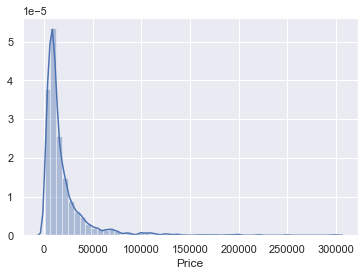

In [8]:
sns.distplot(data_no_mv['Price'])
#For optimal results we are looking for a normal distribution
#This is an exponential distribution

- Looking at the mean, min, 25%, 50%, 75%, and max of the 'Price' variable we can see that we have a few outliers in the 'Price' variable
- One way to deal with outliers is to remove the top 1% of observations

### Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

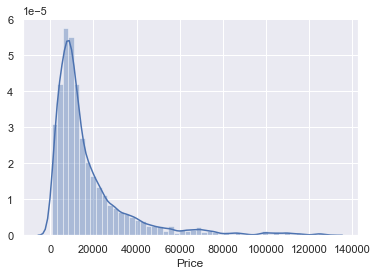

In [10]:
sns.distplot(data_1['Price'])

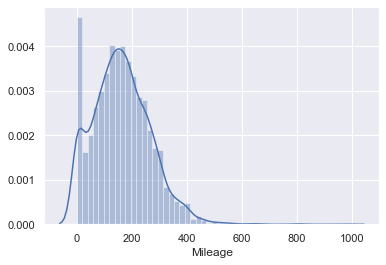

In [11]:
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

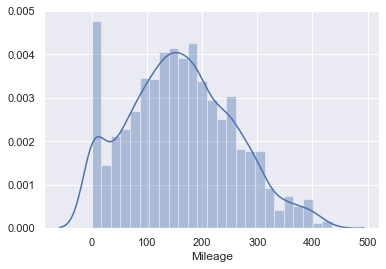

In [13]:
sns.distplot(data_2['Mileage'])

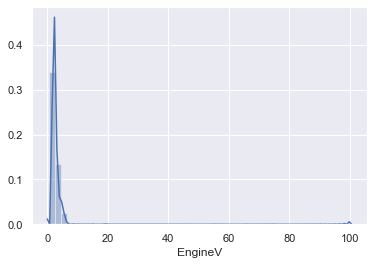

In [14]:
sns.distplot(data_no_mv['EngineV'])

In [15]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

EngineV
2512     0.60
188      0.65
3295     1.00
2725     1.00
1923     1.00
...       ...
1311    99.99
3114    99.99
1264    99.99
3641    99.99
256     99.99

[4195 rows x 1 columns]

The PDF for EngineV is quite strange, looking at the data manually we can see that there are engine values of 99.99, 90, 75, etc. Looking at the descriptives we can see that most values are actually really low. A quick google will tell us that the interval for engine volume is between 0.6 and 6.5. Therefore any entries higher than 6.5 are incorrect.

In fact, a common way to label missing values is by assigning 99.99, it is a bad idea to label values insuch ways as it is hard for other users of the data to distinguish them from true values. 

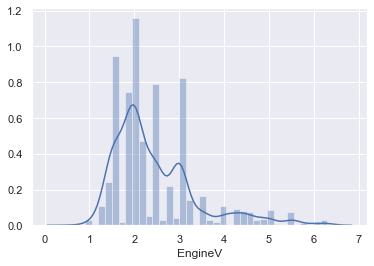

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

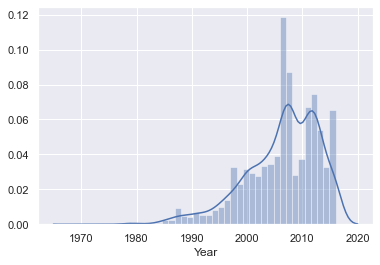

In [17]:
sns.distplot(data_no_mv['Year'])

This time we will find the first percentile and keep all observations that are higher than that, instead of the 99th percentile and lower

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

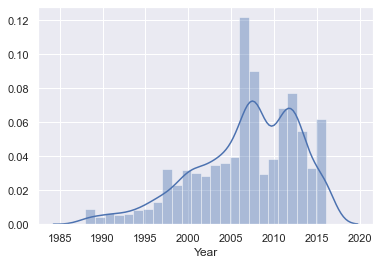

In [19]:
sns.distplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include = 'all')

# Before the reset, the indices in our dataset refer to all the 
# data, but we want them to describe only the data useful for 
# analysis, drop=True means the old index is forgotten

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

# Checking the OLS Assumptions
- The categorical variables will be included as dummies so we don't need to worry about them when checking the assumptions
- 'Price', 'Year', 'EngineV' and 'Mileage' are those that more likely to be more challenging and cause us more problems

## 1. Linearity
Let's check for linearity using a scatter plot

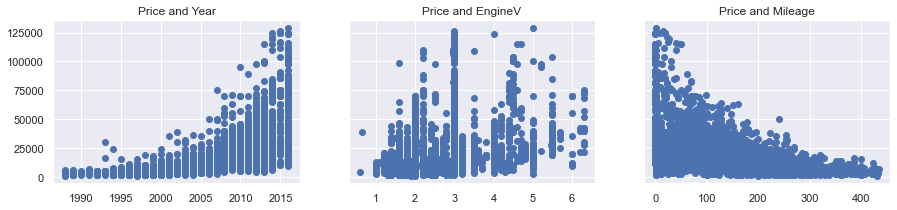

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()
#Explanation of code described below next scatter plot

- We can spot patterns but definitely not linear ones, so we should not perform a linear regression just yet. We need to transform one or more variables first. 
- Recall the price distribution, all these plots are pointing us to the idea that 'Price' is not normally distributed. From there its relationship with the other (rather normally distributed) features is not linear. 
- The patterns we see on the scatter plots above are exponential, using a **log transformation** on 'Price' should help solve the problem
- Log transformations are especially useful when facing exponential relationships as we are currently

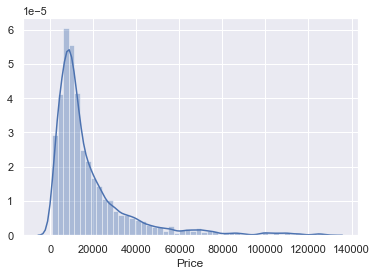

In [22]:
sns.distplot(data_cleaned['Price'])

In [23]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year  log_price  
0          yes  1991   8.342840  
1          yes  1999   8.974618  
2          yes  2003   9.495519  
3          yes  2007  10.043249  
4          yes  2011   9.814656

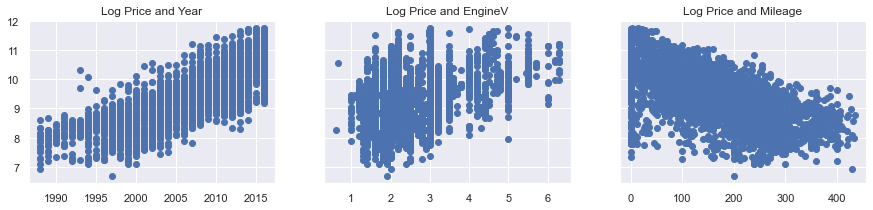

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()
# We can see a linear pattern in all plots now

### Explanation of code
- **plt.subplots()** is a function that returns a tuple containing a figure and axes object(s). Thus when using **f, ax = plt.subplots()** you unpack this tuple into the variables **f** and **ax**.
- Having **f** is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with **fig.savefig('yourfilename.png')**)
- Also all axes objects (the objects that have plotting methods) have a parent figure object anyway so : **f, ax = plt.subplots()** is a more concise version of:
\
**f = plt.figure**
\
**ax = fig.add_subplot(111)**

### Parameters of plt.subplots()
plt.subplots(1, 3, sharey=True, figsize=(15,3))
- 1 corresponds to the number of row
- 3 corresponds to the number of columns
- sharex has a default of False
- sharey here has been set to True as all plots have a y-axis of Price
- figsize sets the size of the figure

In [25]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
#This is no longer needed

## 2. No endogeneity
- There are tests to check if this has been violated or you can take the residuals and find their correlation which each independent X
- The assumption has not been violated in this dataset so it is of no interest
- We will discuss the residuals after the regression is created

## 3. Normality and Homoscedasticity
- Normality is assumed for a large sample following the CLT
- The zero mean of the distribution of errors is achieved with the inclusion of the intercept in the regression
- We can see looking at the scatter plots that homoscedasticity holds. We already implemented the log transformation which is the most common fix for homoscedasticity

## 4. No Autocorrelation
- The observations we have are not coming from time series data or panel data. They are simply a snapshot of the current situation on a second-hand car sales website. Eacch row comes from a different customer who is willing to sell their car through the platform.
- Logically there is no reason for the observations to be dependent on each other

## 5. No multicollinearity

In [26]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

- It is logical that 'Year' and 'Mileage' will be correlated. So we can expect some multicollinearity in the data. 
- Unfortunately, sklearn does not have a method to check this assumption, but statsmodels does
- One of the best ways to check for multicollinearity is through **VIF** (varaince inflation factor)

### Variance Inflation Factor (VIF)
- VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif_df = pd.DataFrame()
vif_df['VIF'] = [vif(variables.values, i) for i in range(variables.shape[1])]
vif_df['features'] = variables.columns

1. import variance_inflation_factor from statsmodels
2. assign to variables the variables you want to check for collinearity
3. 

In [28]:
vif_df

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

$ \text{VIF} \in [1, \infty)$
- **The VIF is just $\frac{1}{(1-R^2)}$**
- If VIF = 1: no multicollinearity
- 1 < VIF < 5: perfectly ok
- There is no consensus on what is unacceptable some say a VIF > 5, some say VIF > 6, others say VIF > 10.
- From experience, you'll rarely find data so perfect that all features have VIF < 5. We will take VIF > 10 as unacceptable. 
- Therefore we should drop Year as it is too correlated with other predictors

In [29]:
data_no_mc = data_cleaned.drop(['Year'], axis=1)

### When can you safely ignore Multicollinearity?
1. The variables with high VIF are control variables, and the variables of interest do not have high VIFs
2. The high VIFs are caused by the inclusion of powers or products of other variables
3. The variable with VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories

For more: https://statisticalhorizons.com/multicollinearity/

# Create dummy variables

- **pd.get_dummies()** spots all categorical variables and creates dummies automatically
- If we have N categories for a feature we have to create N-1 dummies, the reason for this is if all categories bar one return 0, then the variable must belong to the final category
- If we include a separate dummy variable for each category we will introduce multicollinearity to the regression!

In [30]:
data_dummies = pd.get_dummies(data_no_mc, drop_first=True)

In [31]:
data_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Rearrange a bit

In [32]:
# We want to rearrange the columns to have log_price as the first column
# the easiest way to do this is manually
# We get the column names and then assign them to a variable cols
# then rearrange as desired. Finally store this in a new df
data_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
# pp = preprocessed
data_pp = data_dummies[cols]
data_pp.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

# Linear Regression Model

### Declare the inputs and targets

In [35]:
targets = data_pp['log_price']
inputs = data_pp.drop(['log_price'], axis=1)

### Scale the data

In [36]:
scaler = ss()
scaler.fit(inputs)

StandardScaler()

In [37]:
inputs_scaled = scaler.transform(inputs)

The above has standardised all input variables. It is not usually recommended to standardize dummy variables. In fact many practitioners would argue strongly against it.
\
But for ML purposes we rarely put much thought into it and go with the scaled dummies. **Scaling has no effect on the predictive power of the dummies, once scaled though, they lose all their dummy meaning**

### Train Test Split

In [38]:
x_train, x_test, y_train, y_test = tts(inputs_scaled, targets, test_size = 0.2, random_state = 42)

### Create the regression

In [39]:
reg = lr()
reg.fit(x_train, y_train)
# This has created a log-linear model as the dependent variable is 
# the log of the price

LinearRegression()

In [40]:
# A simple way to check the final result is to plot the predicted values
# (y_hat) against the observed values (y_train)

y_hat = reg.predict(x_train) 

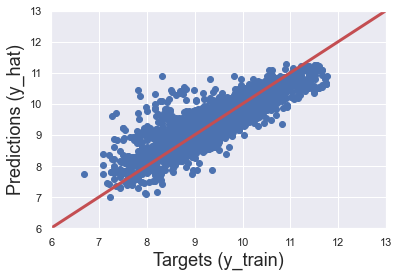

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)

x1 = np.linspace(5, 15, 1000)
y1 = x1
plt.plot(x1, y1, '-r', lw =3)

plt.show()

In the best case scenario we want the targets to equal the predictions, so the closer our scatter plot is to the red line, the better.
\
Our scatter plot here is pretty close, we can see our points are situated around the line, which is good
\
\
Another check is the **residuals plot**. 
- Residual = Differences between the targets and predictions
- The residuals are the estimates of the errors so we expect them to be normally distributed

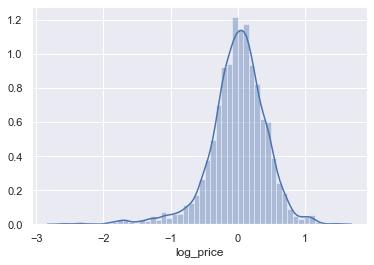

In [42]:
sns.distplot(y_train - y_hat)

- This looks good as it appears normally distributed, with a zero mean. The only issue is the long tail on the left. 
- This means that there are certain observations for which (y_train - y_hat) is much lower than the mean (i.e. a much higher price is predicted than observed)
- From the fact that there are no such predictions on the right hand side, we can conclude that the predicitons rarely underestimate the targets

In [43]:
reg.score(x_train, y_train)

0.7546487921881218

### Finding the weights and bias

In [44]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [45]:
reg.intercept_

9.421003614148074

In [46]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.468156
1               EngineV  0.215268
2             Brand_BMW  0.011052
3   Brand_Mercedes-Benz  0.005692
4      Brand_Mitsubishi -0.142472
5         Brand_Renault -0.187693
6          Brand_Toyota -0.065297
7      Brand_Volkswagen -0.098989
8            Body_hatch -0.139808
9            Body_other -0.093845
10           Body_sedan -0.178928
11           Body_vagon -0.114576
12             Body_van -0.156680
13      Engine Type_Gas -0.116853
14    Engine Type_Other -0.025723
15   Engine Type_Petrol -0.151062
16     Registration_yes  0.314421

#### Weights interpretation
Continuous Variables:
1. A positive weight shows that as a feature increases in value, so do the log_price and Price respectively
2. A negative weight shows that as a feature increases in value, log_price and Price decrease

Dummy variables:
1. A positive weight shows that the respective category (e.g. Brand_BMW) is more expensive than the benchmark (e.g. Audi)
2. A negative weight shows that the respective category (e.g. Brand_Mitsubishi) is less expensive than the benchmark (e.g. Audi)

In [47]:
data_cleaned['Brand'].unique()
# By looking at this and the above table we can determine that 
# Audi is the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [48]:
data_cleaned['Body'].unique()
# the benchmark here is crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [49]:
data_cleaned['Engine Type'].unique()
# the benchmark here is diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [50]:
data_cleaned['Registration'].unique()
# the benchmark here is no

array(['yes', 'no'], dtype=object)

### Testing

In [51]:
y_hat_test = reg.predict(x_test)

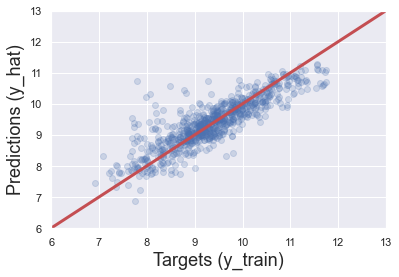

In [52]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)

x1 = np.linspace(5, 15, 1000)
y1 = x1
plt.plot(x1, y1, '-r', lw =3)

plt.show()

- Our model is very good at predicting higher prices
- However for lower prices our plot is more scattered, pointing to the fact that we're not quite getting the prices right here
- We can include an additional parameter to the scatter plot called alpha, which will show the proportional opacity of the points. This turns the scatter plot into a 'heat map' of sorts.
- This allows us to see that the majority of points are very close to the red line

In [53]:
df_pf = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_pf.head()
# These df_pf is for the performance of our model
# Below are the predictions of the log prices
# We would rather examine the prices, to do so we can take the 
# exponential of the log prices

Prediction
0   10.607063
1    8.981794
2    8.658221
3    9.186643
4    8.857567

In [54]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf.head()

Prediction
0  40419.308971
1   7956.895960
2   5757.284408
3   9765.810605
4   7027.363814

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()
# Unfortunately we have a lot of missing values when we do this

Prediction  Target
0  40419.308971  4200.0
1   7956.895960     NaN
2   5757.284408     NaN
3   9765.810605     NaN
4   7027.363814     NaN

In [56]:
y_test.head()
# To see why we have so many missing values we look at the dataset
# What we see is that it has indexes, when we split the data into train
# and test, the original indices were preserved

# So when we added y_test to df_pf, pandas tried to match the indices
# We need to forget this original indexing

2174    9.966462
1420    9.093807
2478    8.086410
1584    9.392662
952     8.594154
Name: log_price, dtype: float64

In [57]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [60]:
df_pf = df_pf.drop(['Target'], axis=1)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

Prediction   Target
0  40419.308971  21300.0
1   7956.895960   8900.0
2   5757.284408   3250.0
3   9765.810605  12000.0
4   7027.363814   5400.0

In [62]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
# This whole dataframe makes a lot of sense when evaluating the
# regression. OLS is based on minimising SSE, which is achieved by 
# minimising the sum of square residuals

# Examining the residuals is the same as examining the heart of the 
# algorithm

Prediction   Target      Residual
0  40419.308971  21300.0 -19119.308971
1   7956.895960   8900.0    943.104040
2   5757.284408   3250.0  -2507.284408
3   9765.810605  12000.0   2234.189395
4   7027.363814   5400.0  -1627.363814

In [63]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

Prediction   Target      Residual  Difference%
0  40419.308971  21300.0 -19119.308971    89.762014
1   7956.895960   8900.0    943.104040    10.596675
2   5757.284408   3250.0  -2507.284408    77.147213
3   9765.810605  12000.0   2234.189395    18.618245
4   7027.363814   5400.0  -1627.363814    30.136367

In [64]:
df_pf.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   16113.011638   17799.988992   1686.977355    42.085282
std    13326.229797   19723.434542  11192.614496    96.169928
min      967.030415     999.000000 -42859.020603     0.020246
25%     7467.591694    6700.000000  -2246.354353    11.024941
50%    11914.358989   11050.000000    -38.697776    24.086183
75%    20249.505640   20475.000000   3004.524837    42.381716
max    79026.348020  125000.000000  81051.158885  1785.792525

In [67]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

Prediction   Target  Residual  Difference%
387    13602.75 13600.00     -2.75         0.02
74     28889.06 28900.00     10.94         0.04
314    35530.21 35500.00    -30.21         0.09
336    11313.27 11300.00    -13.27         0.12
425     2995.68  3000.00      4.32         0.14
..          ...      ...       ...          ...
713    13941.93  2200.00 -11741.93       533.72
280    39469.51  4800.00 -34669.51       722.28
219    27632.40  2900.00 -24732.40       852.84
750    30076.59  3150.00 -26926.59       854.81
681    45259.02  2400.00 -42859.02      1785.79

[774 rows x 4 columns]

# Conclusion
### Outliers
- Looking at the bottom of the dataframe, we can see that there are very few values that are far off the observed values. We can see that the targets (observed prices) are extrmely low here.
- An important note is that all residuals for these outliers are negative (recall residuals distribution), therefore the predictions are higher than the targets. An explanation may be that we are missing an important factor, which could drive the price of the used car lower.
- It may be the model of the car which we removed at the beginning of the analysis or it may be that the car was damaged in some way.

### How to improve our model
1. Use a different set of variables
2. Remove a bigger part of the outliers
3. Use different kinds of transformations

On average though the model is good at predicting price

## Challenge

Take the model and try to improve it, here are some suggestions:
- Perform feature selection
- Create a regression where 'Price' is not transformed
- Deal with the outliers in a different way